# Business Understanding

### Columns and description of dataset

1. ID: Unique number to represent patient ID
2. PRG: (Plasma glucose)
    Hyperglycemia (high levels of plasma glucose) is commonly associated with sepsis.
3. PL: Blood Work Result-1 (mu U/ml) (measures levels of hormones, enzymes, and other blood components)
4. PR: Blood Pressure (mm Hg)
5. SK: Blood Work Result-2 (mm)
6. TS: Blood Work Result-3 (mu U/ml)
7. M11: Body mass index (weight in kg/(height in m)^2)
    Both underweight and obesity can weaken the immune system.  
8. BD2: Blood Work Result-4 (mu U/ml)
9. Age: Patients age (years)
    Age is a significant factor in the risk and outcomes associated with sepsis. 
10. Insurance: If a patient holds a valid insurance card
11. Sepsis: (Target) 
    * Positive: if a patient in ICU will develop a sepsis
    * Negative: otherwise 

Source: 
https://www.kaggle.com/datasets/chaunguynnghunh/sepsis/
Google.com 

Sepsis:- the body's overwhelming and dysregulated response to an infection
// 1. The immune system is not able to effectively fight off a bacterial or viral infection, leading to inflammation



Goal: Build a model to predict if an ICU patient will develop a sepsis 

Null Hypothesis: There is no association between elevated plasma glucose levels and patients developing sepsis. 

Alternate Hypothesis: Elevated plasma glucose levels are associated with patients developing sepsis. 

Analytical Questions
1. What is the effect of age on developing sepsis
2. Is there any correlation between age and sepsis?
3. Does having high plasma glucose level increase the risk for sepsis?
4. Is there any correlation betweeen insurance holders and sepsis?
5. What is the relationship between blood pressure and patients developing sepsis. 

## Data Understanding

In [1]:
#pip install imbalanced-learn

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder


import joblib


In [3]:
# Import Dataset

df=pd.read_csv(r'C:\Users\lenovo\Desktop\Azubi\Project_P6\P6-API_for_ML_model\Dataset\Paitients_Files_Train.csv')
df_test=pd.read_csv('Dataset\Paitients_Files_Test.csv')

In [4]:
#preview train dataset

df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


The dataset has 11 columns. This also includes the target variable (Sepssis)

In [5]:
#preview test dataset

df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


Test dataset has 10 columns. As expected it excludes the target variable (Sepssis)

In [6]:
# check information on train dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


The dataset is an object and integer mixed data types. There are no missing values and contains 599 rows. We will subsequently drop the ID column since is not needed for our modeling. 

In [7]:
# drop column 'ID'

df.drop('ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [8]:
# label encode the 'Sepssis' column 
le = LabelEncoder()
df['Sepsis'] = le.fit_transform(df['Sepssis'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
 10  Sepsis     599 non-null    int32  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 49.3+ KB


In [9]:
# drop column 'Sepssis'

df.drop('Sepssis', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepsis     599 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 44.6 KB


In [10]:
# check information on test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


### EDA

In [11]:
#check duplicates
df.duplicated().sum()

0

In [12]:
#check statistics of features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00
Sepsis,599.0,0.347245,0.476492,0.000,0.000,0.000,1.000,1.00


### Univariate Analysis

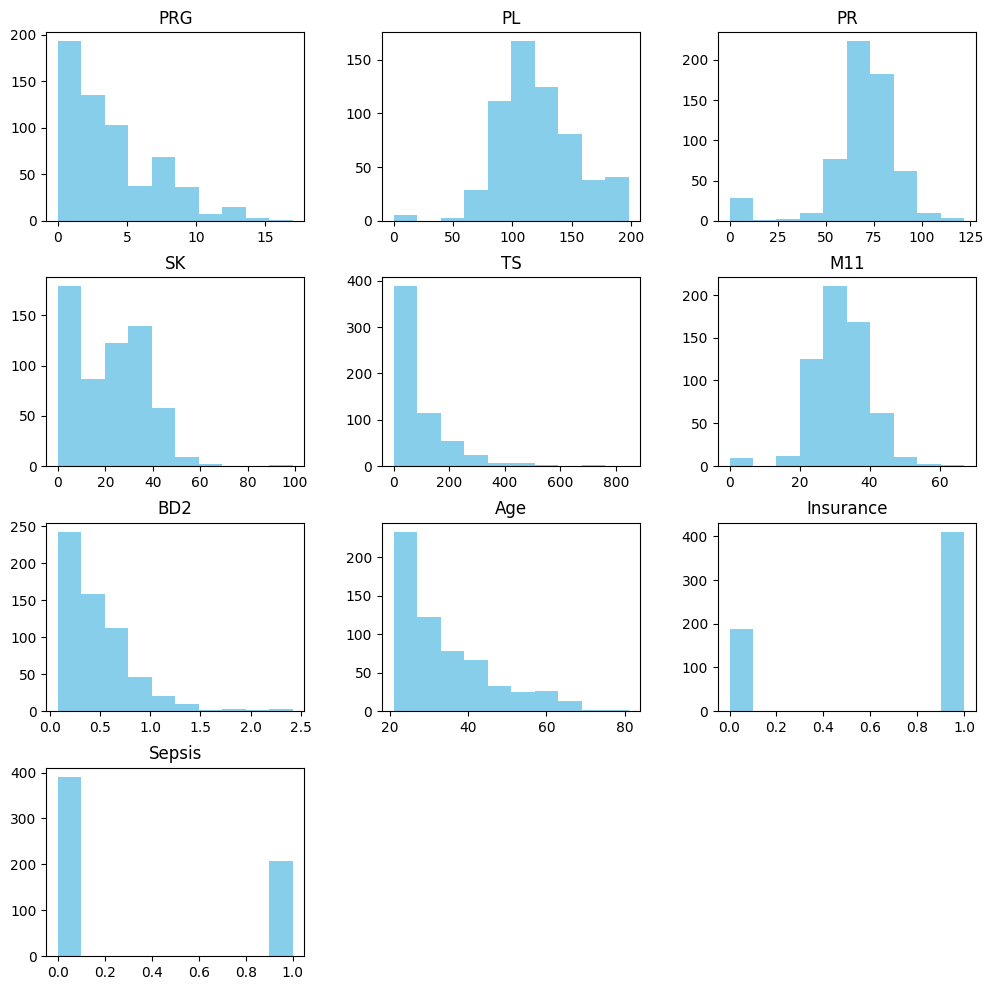

In [13]:
df.hist(figsize=(12,12), grid=False, color='skyblue')
plt.show()

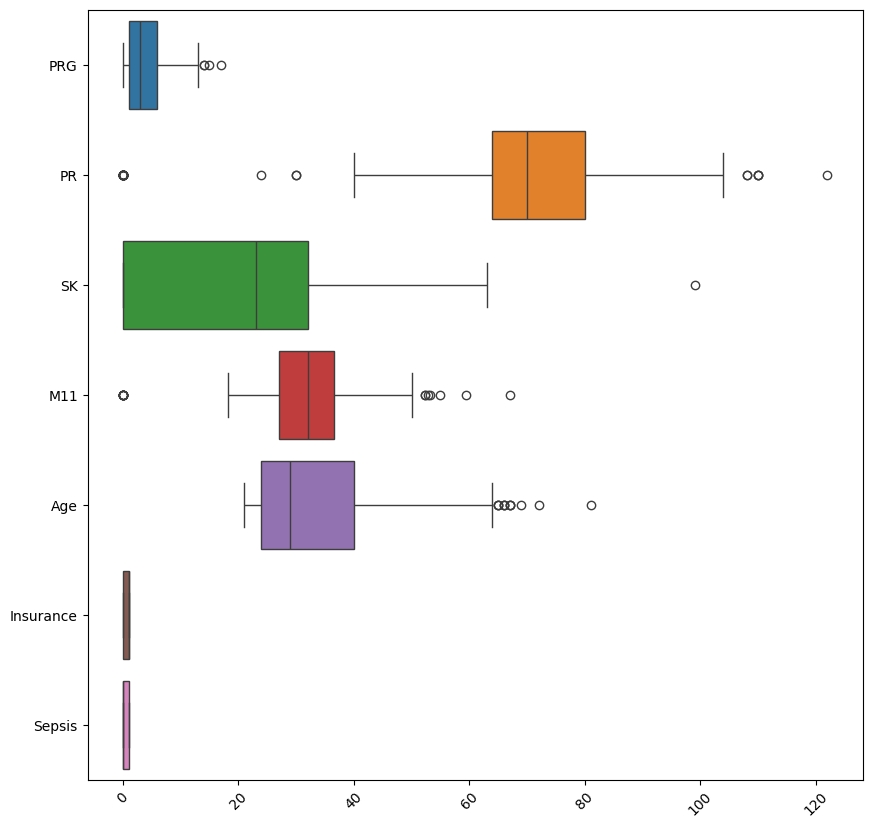

In [14]:
#create boxplots to check outliers
#drop 'TS' and 'PL' which is on a larger scale
#drop 'BD2' which is very small in scale

df_without=df.drop(['TS','PL','BD2'], axis=1)
plt.figure(figsize=(10,10))
sns.boxplot(data=df_without, orient='h')
plt.xticks(rotation=45)
plt.show()

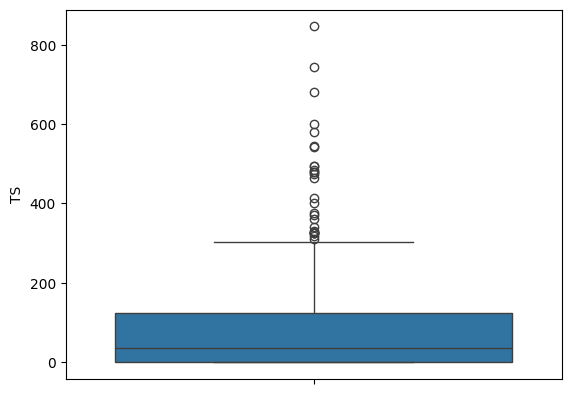

In [15]:
# boxplot on TS

sns.boxplot(data=df['TS'])
plt.show()

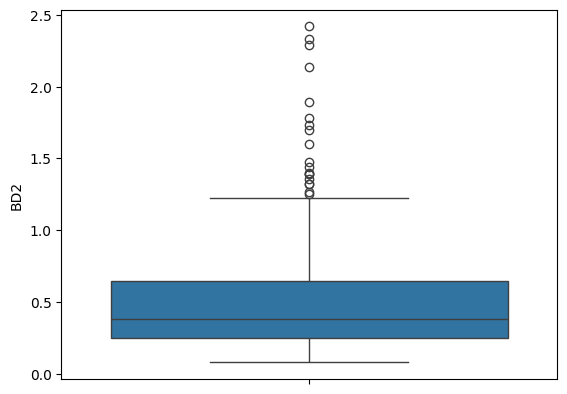

In [16]:
#boxplot on BD2

sns.boxplot(data=df['BD2'])
plt.show()

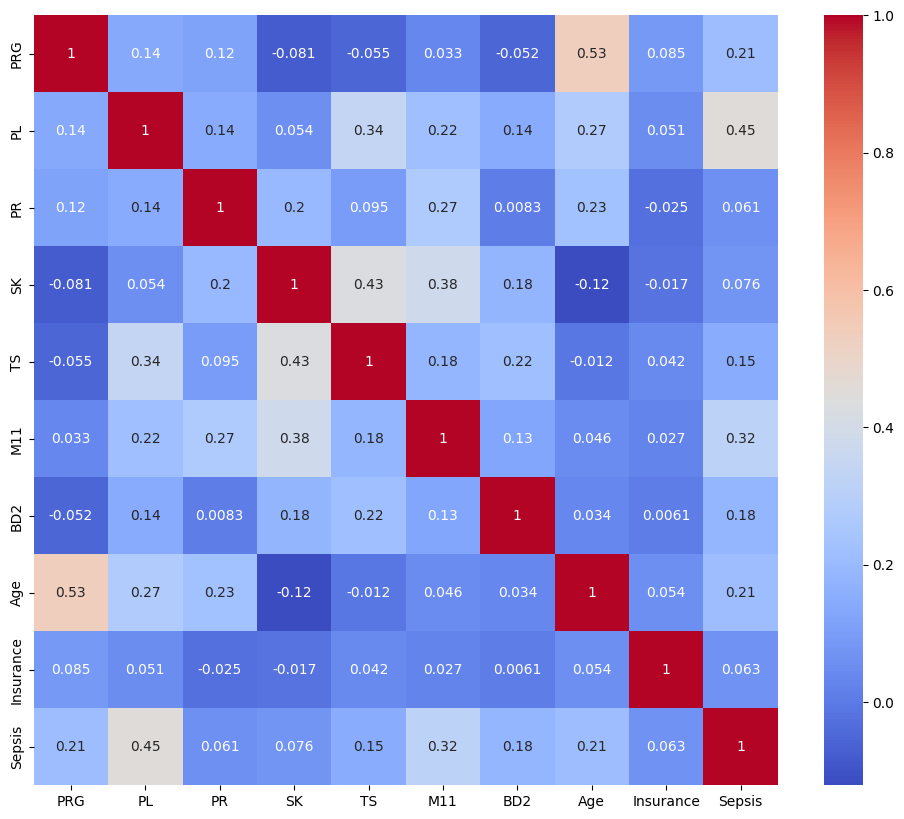

In [17]:
#create a heatmap of columns in dataset

correlation=df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.show()

Observations: 
High correlation between Sepssis and PL of 0.45
Next highest is M11 and Sepssis 

In [18]:
#preview columns of datasets

df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepsis'],
      dtype='object')

### Answer analytical questions

1. What is the effect of age on developing sepsis

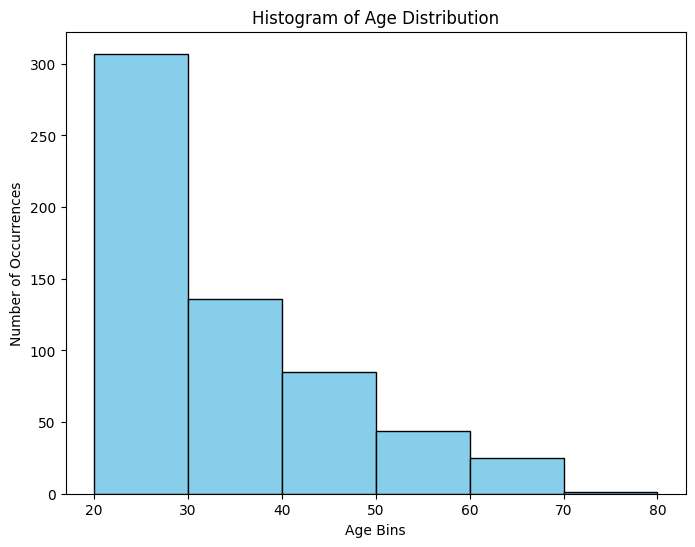

In [19]:

# Define bins for age
bins = [20, 30, 40, 50, 60, 70, 80]  # Adjust the bin edges as needed

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=bins, edgecolor='black', color='skyblue')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age Bins')
plt.ylabel('Number of Occurrences')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12592\694129337.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sepsis_counts = df.groupby([pd.cut(df['Age'], bins), 'Sepsis']).size().unstack(fill_value=0)


<Figure size 1200x1200 with 0 Axes>

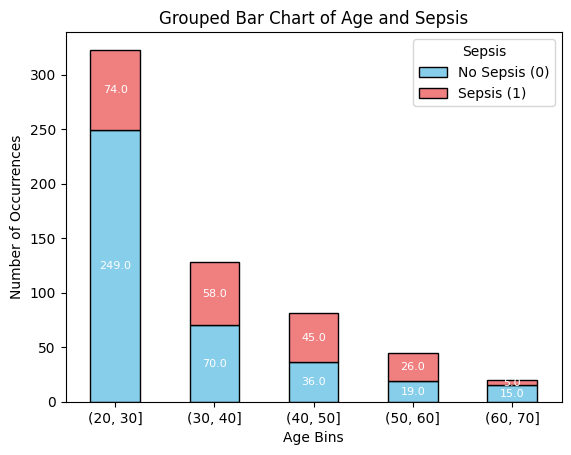

In [20]:
# Define bins for age
bins = [20, 30, 40, 50, 60, 70]  

# Create a grouped bar chart
plt.figure(figsize=(12, 12))

# Count occurrences of sepsis (0 and 1) in each age bin
sepsis_counts = df.groupby([pd.cut(df['Age'], bins), 'Sepsis']).size().unstack(fill_value=0)

# Plot the grouped bar chart
#sepsis_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], edgecolor='black')

# Plot the grouped bar chart
ax = sepsis_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], edgecolor='black')

plt.xticks(rotation=0)

# Add data labels to each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.title('Grouped Bar Chart of Age and Sepsis')
plt.xlabel('Age Bins')
plt.ylabel('Number of Occurrences')
plt.legend(title='Sepsis', labels=['No Sepsis (0)', 'Sepsis (1)'])
plt.show()

2. Is there any correlation between age and sepsis?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12592\2217234476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sepsis', y='Age', data=df, palette='viridis')


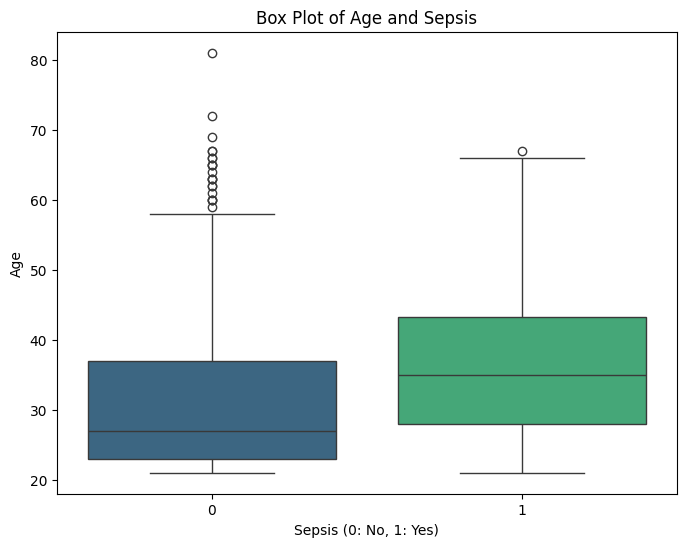

In [21]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sepsis', y='Age', data=df, palette='viridis')
plt.title('Box Plot of Age and Sepsis')
plt.xlabel('Sepsis (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

3. Does having high plasma glucose level increase the risk for sepsis?

In [22]:
df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepsis'],
      dtype='object')

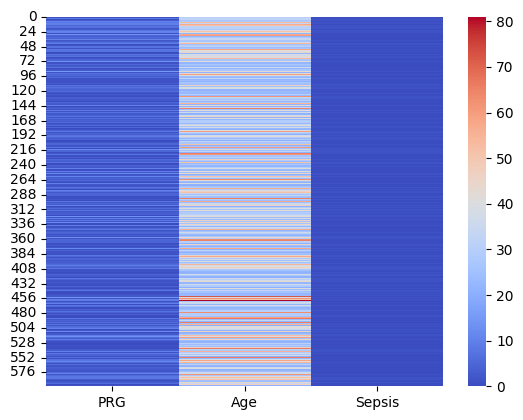

In [23]:
#create a heatmap of columns in dataset

data=df[['PRG', 'Age', 'Sepsis']]
#correlation=df.corr(data)

#plt.figure(figsize=(12,10))
sns.heatmap(data,  cmap='coolwarm')

plt.show()

In [24]:
# Calculate the correlation between 'column1' and 'column2'
correlation = df['Insurance'].corr(df['Sepsis'])

print(f"Correlation between Insurance and Sepsis: {correlation}")

Correlation between Insurance and Sepsis: 0.06258198660459562


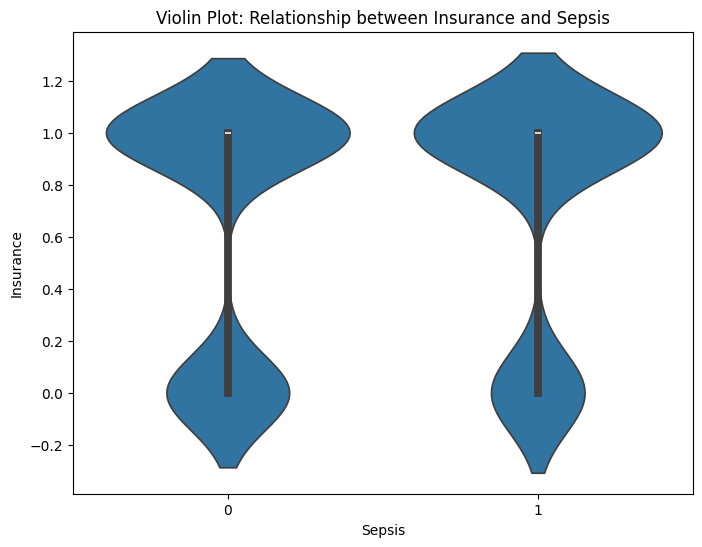

In [25]:
# use a violin plot to show relationship between insurance and sepsis

plt.figure(figsize=(8, 6))
sns.violinplot(x='Sepsis', y='Insurance', data=df)
plt.title('Violin Plot: Relationship between Insurance and Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Insurance')
plt.show()

4. Is there any correlation betweeen insurance holders and sepsis?

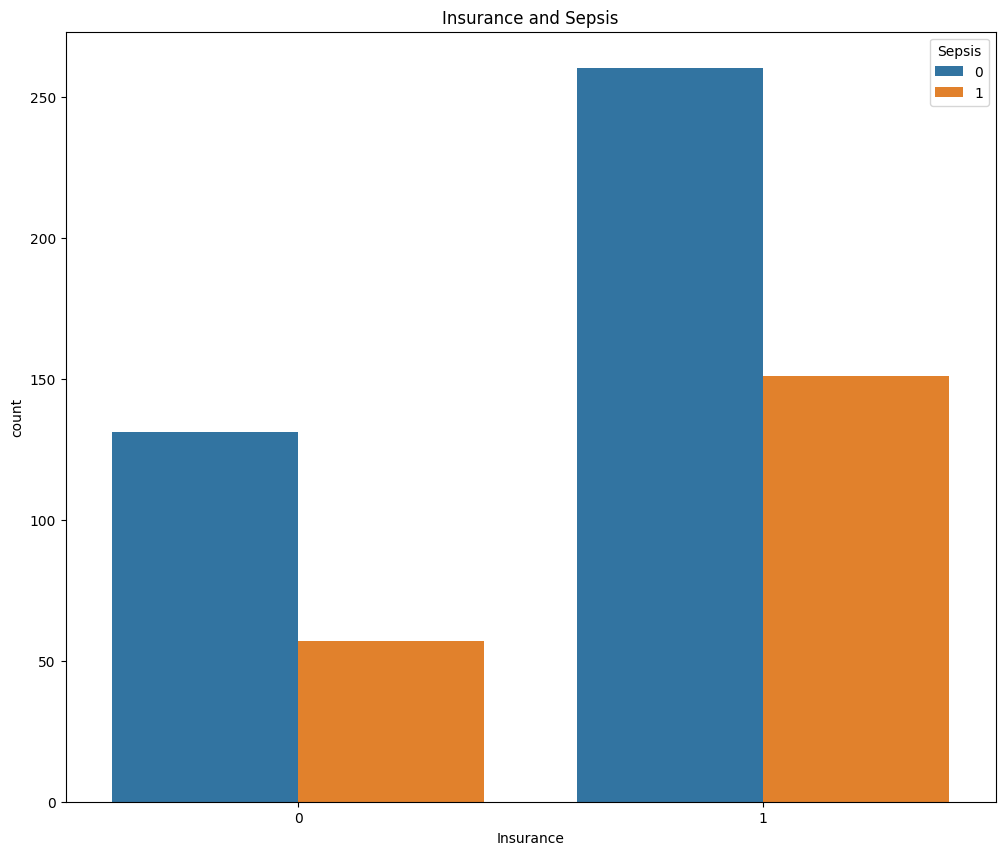

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x='Insurance', hue='Sepsis')
plt.title('Insurance and Sepsis')
plt.show()

5. What is the relationship between blood pressure and patients developing sepsis. 

In [27]:
# Categorize plasma glucose levels into groups (you can adjust the bins accordingly)
#bins = [0, 150, 200, 250]
#df['glucose_category'] = pd.cut(df['plasma_glucose'], bins=bins, labels=['Low', 'Medium', 'High'])

# Create a contingency table
#contingency_table = pd.crosstab(df['glucose_category'], df['sepsis'])

# Perform chi-squared test
#chi2, p, _, _ = chi2_contingency(contingency_table)
#print(f"Chi-squared value: {chi2}")
#print(f"P-value: {p}")

## Data Preparation

In [28]:
# Split dataset into training and evaluation sets
# 'Sepssis' is the target variable (y) and other columns are features (X)

features = df.drop('Sepsis', axis=1)
labels = df['Sepsis']

# Split the data into training and evaluation sets
X, X_eval, y, y_eval = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)


### Check balance and balance dataset

In [29]:
#check the balance in dataset

print("\nClass distribution before SMOTE:")
print(pd.Series(y).value_counts())


Class distribution before SMOTE:
Sepsis
0    313
1    166
Name: count, dtype: int64


In [30]:
X.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [31]:
# Apply SMOTE to the training set to balance

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
Sepsis
0    313
1    313
Name: count, dtype: int64


### Create Pipeline

In [32]:
# list columns features to process
# Create column transformer to apply on input features

input_features = X.columns


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)


In [33]:
# Create KNeighborClassifier pipeline

neighbors=KNeighborsClassifier()

pipeline_KNN = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('neighbors', neighbors)
    ]
)

In [34]:
# Create random forest pipeline

rf_classifier = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, min_samples_split= 2, random_state=42)


pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf_classifier', rf_classifier)
    ]
)

In [35]:
# Create Gradient Boosting pipeline

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

pipeline_gb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf_classifier', rf_classifier)
    ]
)

## Modeling

1. Train Model
    1. Train Model 1 - K-Nearest Neigbour (Distance model)
    2. Train Model 2 - Random Forest Classifier
    3. Train Model 3 - Gradient Boosting Classifier
2. Persit Model

In [36]:
# Train and model K-Nearest Neigbour

pipeline_KNN.fit(X_resampled,y_resampled)

knn_pred = pipeline_KNN.predict(X_eval)
print(classification_report(y_eval,knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        78
           1       0.52      0.76      0.62        42

    accuracy                           0.68       120
   macro avg       0.68      0.70      0.67       120
weighted avg       0.72      0.68      0.68       120



In [37]:
# Train and model Random Forest Classifier


pipeline_rf.fit(X_resampled,y_resampled)

rf_pred = pipeline_rf.predict(X_eval)
print(classification_report(y_eval,rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        78
           1       0.57      0.74      0.65        42

    accuracy                           0.72       120
   macro avg       0.70      0.72      0.70       120
weighted avg       0.74      0.72      0.72       120



In [38]:
# Train and model Gradient Boost Classifier

pipeline_gb.fit(X_resampled,y_resampled)

gb_pred = pipeline_gb.predict(X_eval)
print(classification_report(y_eval,gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        78
           1       0.57      0.74      0.65        42

    accuracy                           0.72       120
   macro avg       0.70      0.72      0.70       120
weighted avg       0.74      0.72      0.72       120



In [44]:
# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [45]:
# Use GridSearchCV to perform cross-validated grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled,y_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [47]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### Persiting the trained models

In [48]:

joblib.dump(pipeline_KNN, 'pipeline_KNN.joblib')
joblib.dump(pipeline_rf, 'pipeline_rf.joblib')
joblib.dump(pipeline_gb, 'pipeline_gb.joblib')
joblib.dump(le, 'encoder.joblib')


['encoder.joblib']

In [50]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        626 non-null    int64  
 1   PL         626 non-null    int64  
 2   PR         626 non-null    int64  
 3   SK         626 non-null    int64  
 4   TS         626 non-null    int64  
 5   M11        626 non-null    float64
 6   BD2        626 non-null    float64
 7   Age        626 non-null    int64  
 8   Insurance  626 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 44.1 KB
